# Neural Net Crash Course

Welcome to a crash course in neural nets. The goal of this notebook is to:
* Introduce the fundamentals of defining and training a basic neural network
* Share some nifty python tools
* Build a basic neural net from scratch
* Show what it takes to achieve world-class performance

Before we get started, we will be using the fastai library to fuel our endeavours. So let's import a few things.

In [1]:
# !pip install -Uqq fastbook
from fastbook import *
setup_book()
from fastai.vision.all import *

matplotlib.rc('image', cmap='Greys')

In this tutorial, we will be training a model to classify different hand-written digits.

## Data Gathering

Training a neural network without any data may lead us down a weird - maybe wonderful - path but let's avoid it. First, we will source the famous MNIST dataset. 
    
    The MNIST dataset is a large dataset of hand-written digits collected by the National Institude of Standards and Technology and then collated into a machine learning dataset by Yann Lecun and his colleagues. Yann LeCun shared the Turing Award back in 2018 for his work that contributes to the field of deep learning.

![mnist_examples.png](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

Fastai provides a plethora of little tools to make life easier. So let's use them to gather the dataset into a nice format we can use. Pathlib is an awesome idea too so let's use that also.

In [60]:
path = untar_data(URLs.MNIST_TINY)

In [61]:
Path.BASE_PATH = path

In [62]:
path.ls()

(#5) [Path('labels.csv'),Path('models'),Path('test'),Path('train'),Path('valid')]

Wonderful. Now we have two folders, one for training and another for testing. Let's take a deeper look into these folders to see what's inside. You may notice a familiar linux command `ls`. Pathlib allows us to leverage such commands right via python code. Again, it's awesome!

In [63]:
(path/'train').ls()

(#2) [Path('train/3'),Path('train/7')]

In [64]:
(path/'test').ls()

(#20) [Path('test/1503.png'),Path('test/1605.png'),Path('test/1883.png'),Path('test/2032.png'),Path('test/205.png'),Path('test/2642.png'),Path('test/3515.png'),Path('test/3848.png'),Path('test/3878.png'),Path('test/4605.png')...]

As you can see, the dataset is nicely structured, first my training or test and then by digit. It looks like we can are on the right path (pun intended :P). Before we jump into modeling, let's take a quick look at what we are actually dealing with. 

In [65]:
dls = ImageDataLoaders.from_folder(path, valid_pct=0.2)
dls.train_ds.items[:3]

[Path('test/3515.png'), Path('train/3/9004.png'), Path('valid/3/938.png')]

In [66]:
fnames = get_image_files(path)
def label_func(x): return x.parent.name
dls = ImageDataLoaders.from_path_func(path, fnames, label_func)
dls.train_ds.items[:3]

[Path('train/3/7878.png'), Path('train/3/9779.png'), Path('valid/3/8087.png')]

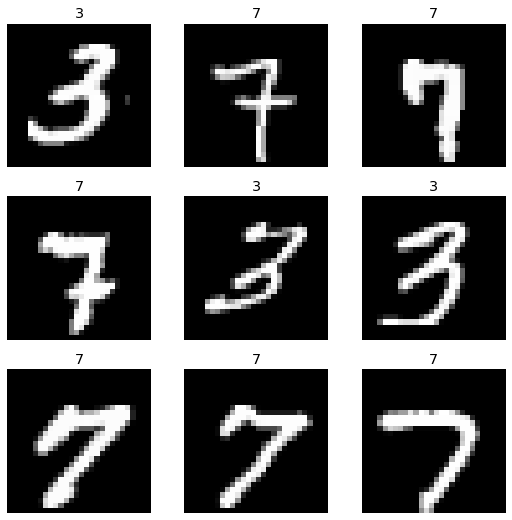

In [67]:
dls.show_batch()

## 1. Fastai's High-level API

Now let's use a game-changing technique called Transfer Learning - the process of using a pretrained model for a task different from what is originally trained for. In this example, we are using the Resnet34 architecture that was previously trained on a massive dataset with loads of compute resources. 

To illustrate the power of Transfer Learning, the image below shows the concepts that early layers of a deep learning network may learn (e.g. corners , rounded edges, etc.). Instead of training our own model on loads of data from scratch to land at a similar outcome, we can instead leverage these early layers and then tailor our model to the problem at hand.

![Layer1](https://github.com/fastai/fastbook/raw/efff9626b09eb5ae3d83449c3830856abe6d8d53/images/layer1.png)

In fastai, we setup a learner and specify the model we would like to use for transfer learning.

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

Next, we use the fine_tune method that takes care of the tuning of the later layers to learn our new dataset.

In [ ]:
files = get_image_files(path/"test")

In [ ]:
learn.predict(files[0])

In [ ]:
learn.show_results()

So out the box its getting some correct but having troubles with others. Let's do some more training and see where we get to.

In [ ]:
learn.fine_tune(1)

In [ ]:
learn.predict(files[1])

## 2. Deep Learning from Scratch using PyTorch

In [2]:
path = untar_data(URLs.MNIST, dest='full_mnist')

In [3]:
Path.BASE_PATH = path

In [4]:
(path/'training').ls()

(#10) [Path('training/0'),Path('training/1'),Path('training/2'),Path('training/3'),Path('training/4'),Path('training/5'),Path('training/6'),Path('training/7'),Path('training/8'),Path('training/9')]

## Take a peek at the data

In [5]:
threes = (path/'training'/'3').ls().sorted()

In [6]:
(path/'training').ls()

(#10) [Path('training/0'),Path('training/1'),Path('training/2'),Path('training/3'),Path('training/4'),Path('training/5'),Path('training/6'),Path('training/7'),Path('training/8'),Path('training/9')]

In [7]:
three_tensors = [tensor(Image.open(o)) for o in threes]

In [8]:
three_tensors[1].size()

torch.Size([28, 28])

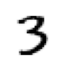

In [9]:
show_image(three_tensors[1]);

## Prepare the data

Generally, when working with floats we want the data to be between 0 and 1 thus we will divide each by 255 to do this. Moreover, we need to stack our images into a nice rank 3 tensor for our model. For example:

In [10]:
stacked_threes = torch.stack(three_tensors).float()/255

In [11]:
stacked_threes.size() # 6131 images of 28 pixel width and 28 pixel length.

torch.Size([6131, 28, 28])

In [12]:
stacked_threes.ndim # rank 3

3

In [14]:
def get_data(num, data='training'):
    nums = (path/data/num).ls().sorted()
    num_tensors = [tensor(Image.open(o)) for o in nums]
    return torch.stack(num_tensors).float()/255

In [15]:
get_data('3')[0][8:16, 8:16]

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.8118, 0.9961, 0.8235, 0.9961],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.3294, 0.8078, 0.9961, 0.9961],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0941, 0.8196, 0.9961],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.3569, 0.5373, 0.9922, 0.9961],
        [0.0000, 0.0000, 0.1569, 0.8392, 0.9804, 0.9961, 0.9961, 0.9961],
        [0.0000, 0.0000, 0.3176, 0.9686, 0.9961, 0.9961, 0.9961, 0.9961],
        [0.0000, 0.0000, 0.0000, 0.4314, 0.9647, 0.9961, 0.9961, 0.9961],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.2863, 0.3490, 0.3490, 0.3647]])

### Training set:

In [16]:
training = [get_data(str(i)) for i in range(10)]

In [17]:
train_x = torch.cat(training).view(-1, 28*28)

In [18]:
labels = []
for n, x in enumerate(training):
    labels += [n]*len(x)
train_y = tensor(labels).unsqueeze(1)

In [19]:
train_x.shape, train_y.shape

(torch.Size([59530, 784]), torch.Size([59530, 1]))

In [20]:
# 60000 images, 28*28 (784) pixels
# 60000 labels

In [21]:
train_x[0].shape # first digit image

torch.Size([784])

### Validation set:

In [22]:
testing = [get_data(str(i), data='testing') for i in range(10)]

In [23]:
valid_x = torch.cat(testing).view(-1, 28*28)

In [24]:
labels = []
for n, x in enumerate(testing):
    labels += [n]*len(x)
valid_y = tensor(labels).unsqueeze(1)

In [25]:
valid_x.shape, valid_y.shape

(torch.Size([10000, 784]), torch.Size([10000, 1]))

In [26]:
# valid_x: 10000 images, 28*28 (784) pixels
# valid_y: 10000 labels

Emulating the PyTorch dataset:

In [27]:
train_dset = list(zip(train_x,train_y))
valid_dset = list(zip(valid_x,valid_y))

In [28]:
dl = DataLoader(train_dset, batch_size=256)
xb,yb = first(dl) # Take a sample for example
xb.shape, yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [29]:
valid_dl = DataLoader(valid_dset, batch_size=256)

## Training

### 1. Initialise weights

In [30]:
def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_()

In [31]:
weights = init_params((28*28,10))
bias = init_params(10)

In [32]:
weights, bias

(tensor([[ 0.9007, -2.1055,  0.6784,  ..., -0.4780, -0.3925, -1.4036],
         [-0.7279, -0.5594, -0.7688,  ...,  0.4396, -0.7581,  1.0783],
         [ 0.8008,  1.6806,  0.3559,  ...,  0.0418, -0.2516,  0.8599],
         ...,
         [ 1.2942,  0.1953, -1.7753,  ...,  0.3531,  0.4474,  0.7192],
         [-1.9300,  0.9975, -1.1493,  ...,  0.2528,  0.2169,  0.4700],
         [-0.7612,  2.3327, -0.1827,  ..., -1.9951,  0.8147, -1.7958]], requires_grad=True),
 tensor([-0.4355, -0.4923, -0.4835, -0.4625,  0.0382, -0.2309, -0.2454, -0.4351, -0.4533, -0.1592], requires_grad=True))

### 2. Make predictions

In [33]:
batch_x, batch_y = xb[:4], yb[:4]
batch_x.shape, batch_y.shape

(torch.Size([4, 784]), torch.Size([4, 1]))

#### Out of the box with Torch

In [34]:
t_linear = nn.Linear(784, 10, bias=True)

In [35]:
t_linear.weight.shape, t_linear.weight.mean(), t_linear.bias

(torch.Size([10, 784]),
 tensor(-0.0002, grad_fn=<MeanBackward0>),
 Parameter containing:
 tensor([ 0.0133, -0.0342, -0.0138, -0.0245,  0.0152, -0.0251,  0.0277,  0.0087,  0.0219, -0.0233], requires_grad=True))

In [36]:
t_output = t_linear(batch_x)
t_output.shape

torch.Size([4, 10])

In [37]:
t_output[0]

tensor([-0.0058,  0.2581,  0.1805, -0.0618, -0.0244, -0.0693,  0.3346, -0.1383,  0.2380, -0.1101], grad_fn=<SelectBackward>)

In [38]:
t_preds = torch.argmax(t_output, dim=1)
t_preds.shape

torch.Size([4])

Predicted: 6
Actual: 0


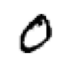

In [39]:
print(f'Predicted: {t_preds[0]}')
print(f'Actual: {batch_y[0].item()}')
show_image(batch_x[0].view(-1, 28, 28));

#### Linear layer from scratch

In [40]:
def linear1(xb): return xb@weights + bias

In [41]:
output = linear1(batch_x)
output.shape

torch.Size([4, 10])

In [42]:
preds = torch.argmax(output, dim=1)
preds.shape

torch.Size([4])

Predicted: 7
Actual: 0


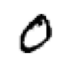

In [43]:
print(f'Predicted: {preds[0]}')
print(f'Actual: {batch_y[0].item()}')
show_image(batch_x[0].view(-1, 28, 28));

In [44]:
correct = (preds == batch_y.squeeze())
correct # None :(

tensor([False, False, False, False])

In [45]:
accuracy = correct.sum().float() / float(batch_y.squeeze().size(0))
print(accuracy)

tensor(0.)


### 3. Calculate the loss

In [46]:
# Softmax + NLL Loss is the way to go when it comes to having more than two classes.

In [47]:
sm_acts = torch.softmax(t_output, dim=1) # using PyTorch
sm_acts.shape

torch.Size([4, 10])

In [48]:
sm_acts[0]

tensor([0.0923, 0.1202, 0.1112, 0.0873, 0.0906, 0.0866, 0.1298, 0.0809, 0.1178, 0.0832], grad_fn=<SelectBackward>)

In [49]:
from torch import exp
def softmax(x): return exp(x) / exp(x).sum(dim=1, keepdim=True) # 

In [50]:
my_sm_acts = softmax(t_output)
my_sm_acts.shape

torch.Size([4, 10])

In [51]:
my_sm_acts[0]

tensor([0.0923, 0.1202, 0.1112, 0.0873, 0.0906, 0.0866, 0.1298, 0.0809, 0.1178, 0.0832], grad_fn=<SelectBackward>)

In [52]:
torch.sum(sm_acts, dim=1) 
# Softmax produces a probability for each class with all activations adding to 1 for each input.

tensor([1.0000, 1.0000, 1.0000, 1.0000], grad_fn=<SumBackward1>)

In [53]:
targ = batch_y.squeeze()
F.nll_loss(sm_acts, targ, reduction='none') 
# However, this is misleading given that Torch doesn't take the log for you.
# Instead to do softmax, and true NLL, we use CrossEntropyLoss.

tensor([-0.0923, -0.0872, -0.0969, -0.0906], grad_fn=<NllLossBackward>)

In [54]:
# NLL Loss is misleading in Torch with it not actually taking the log like we need. Instead,
# CrossEntropyLoss takes scare of all the steps for us.

In [55]:
loss_func = nn.CrossEntropyLoss()

In [56]:
loss = loss_func(sm_acts, targ)
loss

tensor(2.3110, grad_fn=<NllLossBackward>)

### 4. Calculate the gradient

In [57]:
loss.backward()
# weights.grad.shape, weights.grad.mean(), bias.grad

In [58]:
t_linear.weight.grad.shape, t_linear.weight.grad.mean(), t_linear.bias.grad

(torch.Size([10, 784]),
 tensor(1.8056e-11),
 tensor([-0.0835,  0.0116,  0.0112,  0.0070,  0.0093,  0.0072,  0.0109,  0.0086,  0.0104,  0.0071]))

In [59]:
def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = loss_func(preds, yb)
    loss.backward()

In [60]:
calc_grad(batch_x, targ, t_linear)
t_linear.weight.grad.shape, t_linear.weight.grad.mean(), t_linear.bias.grad

(torch.Size([10, 784]),
 tensor(7.6026e-12),
 tensor([-0.9917,  0.1345,  0.1313,  0.0861,  0.1115,  0.0879,  0.1279,  0.1028,  0.1232,  0.0864]))

In [61]:
# Opps the gradients have changed because we have not bothered to clear them at the end of the previous batch.
calc_grad(batch_x, targ, t_linear)
t_linear.weight.grad.shape, t_linear.weight.grad.mean(), t_linear.bias.grad

(torch.Size([10, 784]),
 tensor(-1.5357e-09),
 tensor([-1.8999,  0.2574,  0.2514,  0.1652,  0.2136,  0.1687,  0.2448,  0.1971,  0.2360,  0.1657]))

### 5. Step the weights

Putting it all together.

In [62]:
t_linear.weight.data -= t_linear.weight.grad * 0.0001
t_linear.bias.data -= t_linear.bias.grad * 0.0001

To ensure we don't update any lingering gradients between batches, we need to zero out the currently stored gradients before we move on to the next batch.

In [63]:
t_linear.weight.grad.zero_()
t_linear.bias.grad.zero_();

In [64]:
t_linear.weight.grad.shape, t_linear.weight.grad.mean(), t_linear.bias.grad

(torch.Size([10, 784]),
 tensor(0.),
 tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

### 6. & 7. Repeat until you want to stop

In [65]:
def batch_accuracy(xb, yb):
    labels = yb.squeeze()
    preds = torch.argmax(xb, dim=1)
    correct = (preds == labels)
    return correct.float().mean()

In [137]:
lr = 1.
def train_epoch(model):
    model.train()
    for xb,yb in dl:
        # I don't like calc_grad(xb, yb, model) for the book, instead let's unpack it:
        output = model(xb) # 2. Make predictions
        loss = loss_func(output, yb.squeeze()) # 3. Calculate loss 
        loss.backward() # 4. Calculate gradients (dW/dx)
        for p in model.parameters():  
            p.data -= p.grad.data * lr # 5a. Step the weights
        for p in model.parameters():
            p.grad = None  # 5b. Zero gradients

In [138]:
def validate_epoch(model):
    model.eval()
    accs = [batch_accuracy(model(xb), yb) for xb, yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)

In [139]:
model = nn.Linear(784, 10, bias=True)
for i in range(10):
    train_epoch(model)
    print(validate_epoch(model))

0.2419
0.2876
0.3088
0.3645
0.3988
0.4146
0.4276
0.4368
0.444
0.4496


Woohoo!

## Getting serious with layers and activations

#### Architecture

In [118]:
simple_net = nn.Sequential(
    nn.Linear(28*28, 30, bias=True),
    nn.ReLU(),
    nn.Linear(30,10, bias=True)
)

Adding non-linearities

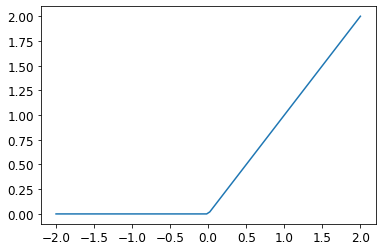

In [119]:
plot_function(F.relu)

#### Optimizer

In [120]:
lr = 1.

In [121]:
class BasicOptim:
    def __init__(self, params, lr):
        self.params, self.lr = list(params), lr
    def step(self, *args, **kwargs):
        for p in self.params: p.data -= p.grad.data * self.lr
    def zero_grad(self, *args, **kwargs):
        for p in self.params: p.grad = None

In [122]:
b_opt = BasicOptim(simple_net.parameters(), lr=lr)

In [123]:
sgd_opt = SGD(simple_net.parameters(), lr=lr)

In [124]:
loss_func = nn.CrossEntropyLoss()

#### Training

In [140]:
# New pipeline with Optim
def train_epoch(model, opt):
    model.train()
    for xb,yb in dl:
        # I don't like calc_grad(xb, yb, model) for the book, instead let's unpack it:
        output = model(xb) # 2. Make predictions
        loss = loss_func(output, yb.squeeze()) # 3. Calculate loss 
        loss.backward() # 4. Calculate gradients (dW/dx)
        for p in model.parameters():  
            p.data -= p.grad.data * lr # 5a. Step the weights
        for p in model.parameters():
            p.grad = None  # 5b. Zero gradients

In [141]:
def validate_epoch(model):
    model.eval()
    accs = [batch_accuracy(model(xvb), yvb) for xvb, yvb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)

In [142]:
def train_model(model, epochs, opt):
    for e in range(epochs):
        train_epoch(model, opt)
        print(validate_epoch(model), end=' ')

In [143]:
train_model(t_linear, 10, sgd_opt)

0.5833 0.6649 0.7266 0.7683 0.7889 0.8057 0.8146 0.8218 0.8274 0.8321 

Predicted: 9
Actual: 0


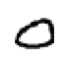

In [115]:
simple_net.eval()
n_b = 5
v_xb,v_yb = first(valid_dl)
output = simple_net(v_xb)
preds = torch.argmax(output, dim=1)
print(f'Predicted: {preds[n_b]}')
print(f'Actual: {v_yb[n_b].item()}')
show_image(v_xb[n_b].view(-1, 28, 28));